# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Study_data_merge = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Study_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count =Study_data_merge['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df=Study_data_merge[Study_data_merge.duplicated(['Mouse ID','Timepoint'],keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
Study_data_merge.loc[Study_data_merge["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=Study_data_merge[Study_data_merge["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
second_mice_count =clean_df['Mouse ID'].nunique()
second_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_df=clean_df.groupby(clean_df["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
TV_mean=Regimen_df["Tumor Volume (mm3)"].mean()
TV_median=Regimen_df["Tumor Volume (mm3)"].median()
TV_var=Regimen_df["Tumor Volume (mm3)"].var()
TV_SD=Regimen_df["Tumor Volume (mm3)"].std()
TV_SEM=Regimen_df["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({"Mean Tumor Volume":TV_mean,"Median Tumor Volume":TV_median,"Tumor Volume Variance":TV_var,"Tumor Volume Std. Dev.":TV_SD,"Tumor Volume Std. Err.":TV_SEM})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics1=Regimen_df["Tumor Volume (mm3)"].agg(mean="mean",median="median",var="var",std="std",sem="sem")
summary_statistics1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

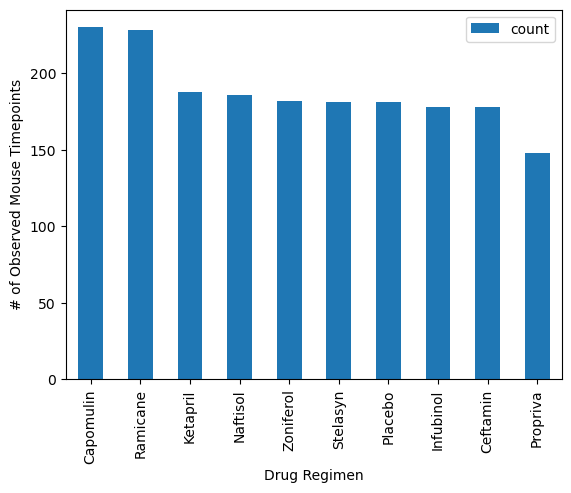

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MouseID_Timepoints=clean_df["Drug Regimen"].value_counts()
Sorted_Timepoints=MouseID_Timepoints.sort_values(ascending=False)
ax=Sorted_Timepoints.plot(kind="bar")
#Label x-axis and y-axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.legend(loc="best")
plt.show()
plt.tight_layout()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


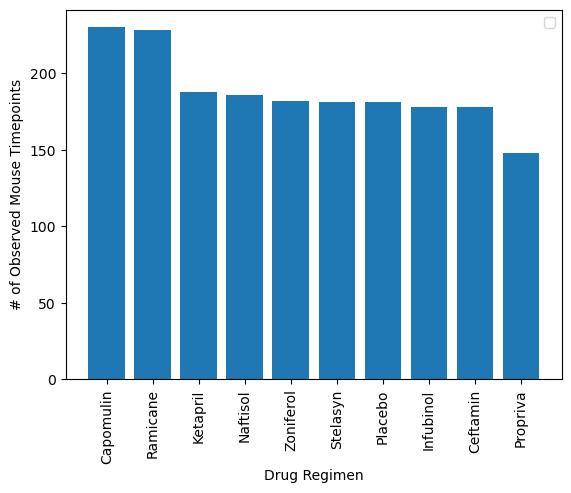

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
MouseID_Timepoints=clean_df["Drug Regimen"].value_counts()
plt.bar(MouseID_Timepoints.index.values,MouseID_Timepoints.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.legend(loc="best")
plt.xticks(rotation='vertical')
plt.show()

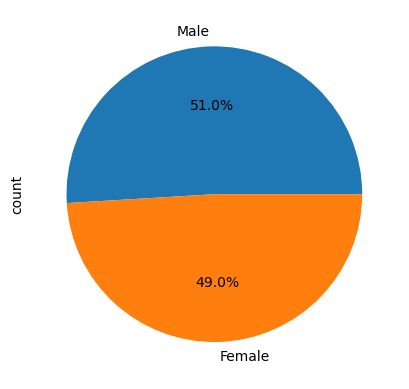

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender=clean_df['Sex'].value_counts()
mice_gender
# Make the pie chart
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'count')

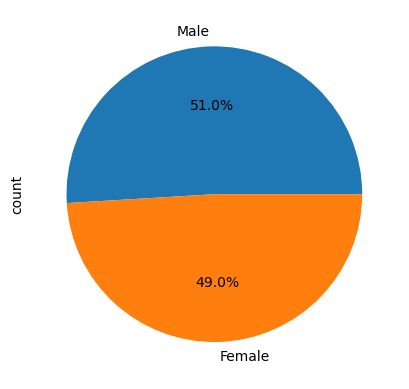

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_unique_gender=mice_gender.nunique
mice_unique_gender
# Make the pie chart
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%')
plt.ylabel('count')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df=clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
greatest_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timpepoint_df=pd.merge(greatest_timepoint_df,clean_df, how="left", on=["Mouse ID", "Timepoint"])
merge_timpepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]



# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
# for loop
for treatment in treatments:
    tumour_volumes=merge_timpepoint_df.loc[merge_timpepoint_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumour_volumes)

    # Determine outliers using upper and lower bounds
    quartiles=tumour_volumes.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    interq=upperq-lowerq
    lower_bound=lowerq-(1.5*interq)
    upper_bound=upperq+(1.5*interq)
    outliers = tumour_volumes[(tumour_volumes < lower_bound) | (tumour_volumes > upper_bound)]
    #Print output
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


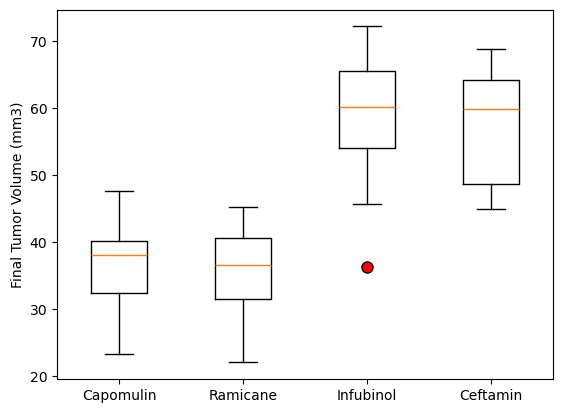

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fliers = dict(marker='o', markerfacecolor='r', markersize=8)
plt.boxplot(tumor_vol_data,flierprops=fliers)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

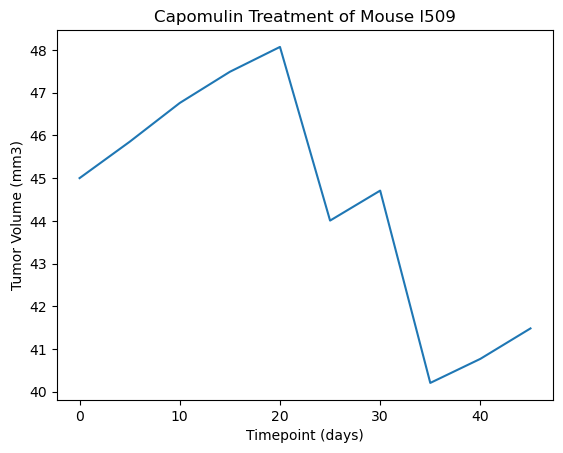

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin=clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(Capomulin["Timepoint"], Capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

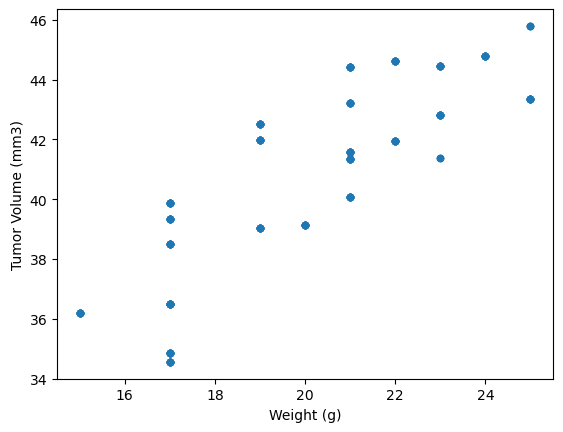

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_regimen_df=clean_df.loc[(clean_df["Drug Regimen"]=='Capomulin')]
avg_tumorvol_df=Capomulin_regimen_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

avg_tumorvol_df.head()
#Merge to get mouse weight
MW_TV_df=pd.merge(avg_tumorvol_df,clean_df[["Mouse ID","Weight (g)"]], how="left", on=["Mouse ID", "Mouse ID"])
MW_TV_df.head()

MW_TV_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume for Capomulin is 0.83


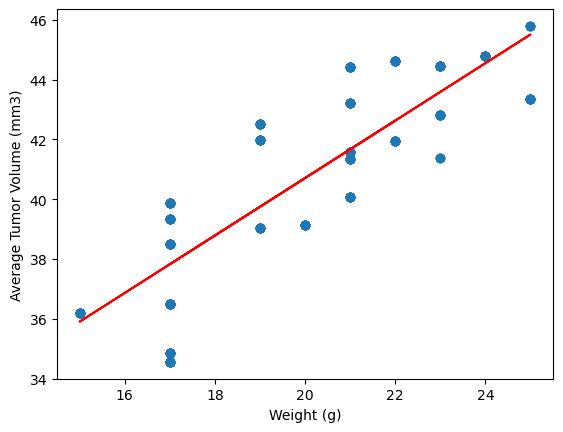

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
tumor=MW_TV_df["Tumor Volume (mm3)"]
weight=MW_TV_df["Weight (g)"]
correlation = st.pearsonr(weight,tumor)
print("The correlation between mouse weight and the average tumor volume for Capomulin is", round(correlation[0],2))
plt.scatter(weight,tumor)
#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()